# Project 1 - Sharks Attack

In [1]:
# I am importing the different libraries to help me achieve the first project. A library is a collection of 
# related modules/functions that will allow us to do what we want to accomplish in an easier way

import pandas as pd
import numpy as np 
import seaborn as sns
import re
pd.options.mode.chained_assignment = None


In [2]:
# Let's start by opening the document and have a look at it 
# I also store the document in a variable called "shark."

shark = pd.read_csv('../data/attacks.csv', encoding = 'unicode_escape')

shark

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# I want to have a look at only the first few rows 
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
# This is to display only a sample and by repeating it, I see a different column each time
shark.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
157,2017.04.13,13-Apr-2017,2017.0,Unprovoked,USA,Florida,"Hanna Park, Jacksonville, Duval County",Surfing,Keeanan Perry,M,...,NaN,"News4Jax, 4/14/2017",2017.04.13-Perry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.13,2017.04.13,6146.0,NaN,NaN


## Hypthoses

Now that I can access the data let's work on a few hypotheses that I will explore and do the relevant code to find the corresponding answer. I will start with easy assumptions before increasing their complexity of them.

1. Are the number of deadly cases going up?
2. What is the geographical repartition of the attacks? 
3. Which activity is the most dangerous to women by XYZ shark ?
4. What time is the best time and location to get a fatal attack?


### 1. Evolution of deadly cases 

In [5]:
# I will look at the first three columns and try to understand which datatype it is.
# This function gives me the data type of each column
shark.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [6]:
shark["Case Number"]

0        2018.06.25
1        2018.06.18
2        2018.06.09
3        2018.06.08
4        2018.06.04
            ...    
25718           NaN
25719           NaN
25720           NaN
25721           NaN
25722            xx
Name: Case Number, Length: 25723, dtype: object

In [7]:
shark["Date"]

0        25-Jun-2018
1        18-Jun-2018
2        09-Jun-2018
3        08-Jun-2018
4        04-Jun-2018
            ...     
25718            NaN
25719            NaN
25720            NaN
25721            NaN
25722            NaN
Name: Date, Length: 25723, dtype: object

In [8]:
shark["Year"]

0        2018.0
1        2018.0
2        2018.0
3        2018.0
4        2018.0
          ...  
25718       NaN
25719       NaN
25720       NaN
25721       NaN
25722       NaN
Name: Year, Length: 25723, dtype: float64

Here, we learn that the last column is already a float compared to the other two objects and will need some cleaning if we want to use it to test the first hypothesis. 

In [40]:
# Here we will just show the columns that interest us for this exercise namely: 
# Year and Fatal 

shark[['Year','Fatal (Y/N)']]

,Year,Fatal (Y/N)
0,2018.0,N
1,2018.0,N
2,2018.0,N
3,2018.0,N
4,2018.0,N
...,...,...
25718,NaN,NaN
25719,NaN,NaN
25720,NaN,NaN
25721,NaN,NaN


In [10]:
# Here I am displaying the different values in the column Year
shark['Year'].unique()


array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [11]:
# I removed the Nan from the column year - let's also create a new subset called hypotheses one to remove 
hypothesis_1 = shark[shark["Year"].notna()]

In [12]:
# I will keep only keep the value starting from 1900 
hypothesis_1 = hypothesis_1[hypothesis_1["Year"] > 1899]
hypothesis_1['Year'].unique()


array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
       1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912., 1911.,
       1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902.,
       1901., 1900.])

In [13]:
#Let's do the same with fatal injuries
hypothesis_1['Fatal (Y/N)'].unique()

#What we found out is that here beside the unrelevant values such as M, UNKNOWN, 2017), there is a lot of values that
#were inserted using space before or in lower case

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N '], dtype=object)

In [14]:
# I will remove the special character 

hypothesis_1['Fatal (Y/N)'] = hypothesis_1['Fatal (Y/N)'].str.replace(' N', 'N')
hypothesis_1['Fatal (Y/N)'] = hypothesis_1['Fatal (Y/N)'].str.replace('N ', 'N')
hypothesis_1['Fatal (Y/N)'] = hypothesis_1['Fatal (Y/N)'].str.replace('y', 'Y')

hypothesis_1['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017'], dtype=object)

In [15]:
# I will remove the undefined - With this technique, the step I did before is
# uncessary

hypothesis_1["Fatal (Y/N)"] = hypothesis_1["Fatal (Y/N)"].str.extract("(^Y)")
hypothesis_1["Fatal (Y/N)"].unique()


array([nan, 'Y'], dtype=object)

In [16]:
#Finally, let's remove the nan values

hypothesis_1 = hypothesis_1[hypothesis_1["Fatal (Y/N)"].notna()]
hypothesis_1["Fatal (Y/N)"].unique()

array(['Y'], dtype=object)

In [17]:
#Here we have the data that we want to diplay the fatal attacks - however there is one missing element.
hypothesis_1[['Year','Fatal (Y/N)']]

,Year,Fatal (Y/N)
6,2018.0,Y
58,2017.0,Y
59,2017.0,Y
64,2017.0,Y
91,2017.0,Y
...,...,...
5545,1901.0,Y
5549,1901.0,Y
5551,1900.0,Y
5552,1900.0,Y


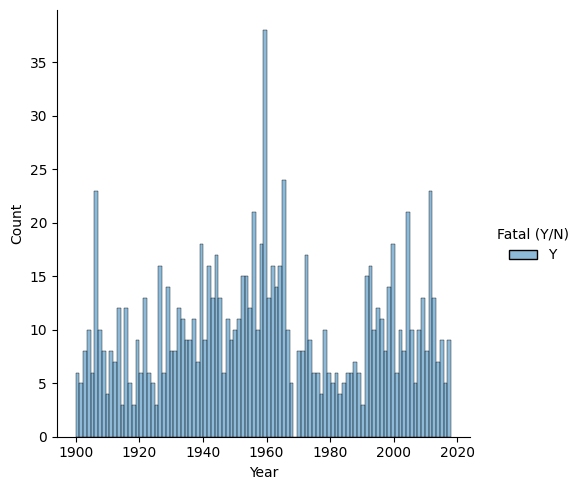

In [18]:
sns.displot(hypothesis_1, x="Year", hue="Fatal (Y/N)", bins=100)

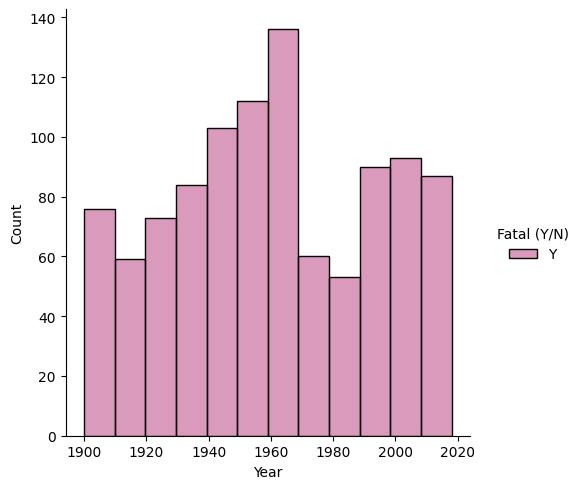

In [19]:
sns.displot(hypothesis_1, x="Year", hue="Fatal (Y/N)", palette="magma")


## 2. What is the geographical repartition of the attacks? 


In [20]:
# Let's first display the value of the geography and see if some value are similar 
shark['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [21]:
# To have a similar structure in the value, we put upper cases everywhere
shark['Country']= shark['Country'].str.upper()
shark['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITED ARAB E

In [22]:
# Removing all the Nan
hypothesis_2 = shark[shark["Country"].notna()]

In [23]:
# I will have a look at the length of the data set now and see how many cases I have 
len(hypothesis_2['Country'])

6252

In [24]:
# I want to check the number of unique value - the result 209 seems a bit high and it is likely that there is some duplicates 
# knowing that there is 195 countries in the world. 
len(hypothesis_2['Country'].unique())

209

In [25]:
# Drop the duplicates so I can have a look at the unique values 
hypothesis_2bis = hypothesis_2.drop_duplicates(subset = "Country")

print(sorted(hypothesis_2bis['Country']))

#What do we find out? 
# Some countries are not countries (ex: Martinique), and sometimes it is more a region that is given. 
# Without entering too much into the technicalities, there is still some work that we can do to clean the country section
# 1. Countries with a space before: Philippines and Tonga 
# 2. Countries with a "?" at the end: Asia, Indian Ocean, Mexico, Red Sea, Sudan, North Atlantic Ocean and the Pacific Ocean
# 3. Countries with a space after: Egypt, Nicaragua, Yemen
# 4. Countries that exist in two forms: Andaman, Ceylon, Reunion, Maldives

[' PHILIPPINES', ' TONGA', 'ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA', 'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS', 'ANGOLA', 'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA?', 'ATLANTIC OCEAN', 'AUSTRALIA', 'AZORES', 'BAHAMAS', 'BAHREIN', 'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA', 'BETWEEN PORTUGAL & INDIA', 'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA', 'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'BURMA', 'CANADA', 'CAPE VERDE', 'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC', 'CEYLON', 'CEYLON (SRI LANKA)', 'CHILE', 'CHINA', 'COAST OF AFRICA', 'COLUMBIA', 'COMOROS', 'COOK ISLANDS', 'COSTA RICA', 'CRETE', 'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'DIEGO GARCIA', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EGYPT ', 'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND', 'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS', 'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FRANCE', 'FRENCH POLYNESIA', 'GABON', 'GEORGIA', 'GHANA', 'GRAND CAYMAN', 'GREECE'

In [26]:
hypothesis_2bis.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [27]:
# 1. Countries with a space before: Philippines and Tonga 
# 2. Countries with a "?" at the end: Asia, Indian Ocean, Mexico, Red Sea, Sudan, North Atlantic Ocean and the Pacific Ocean
# 3. Countries with a space after Egypt, Nicaragua, Yemen
hypothesis_2bis['Country'] = hypothesis_2bis['Country'].str.extract(r'([A-Z]{1,11}\s?[^A-Z])')


In [35]:
##ERROR##
list(hypothesis_2bis['Country'])


[nan,
 nan,
 nan,
 nan,
 nan,
 'SOUTH ',
 nan,
 'COSTA ',
 nan,
 nan,
 'NEW ',
 nan,
 nan,
 nan,
 nan,
 nan,
 'NEW ',
 nan,
 nan,
 'SOLOMON ',
 nan,
 nan,
 'ST ',
 nan,
 nan,
 'FRENCH ',
 'UNITED ',
 'UNITED ',
 nan,
 nan,
 nan,
 nan,
 'CAPE ',
 nan,
 'DOMINICAN ',
 'CAYMAN ',
 nan,
 nan,
 'PUERTO ',
 nan,
 'ATLANTIC ',
 nan,
 'ST.',
 nan,
 'PAPUA ',
 'TRINIDAD &',
 nan,
 nan,
 'DIEGO ',
 nan,
 nan,
 'PALESTINIAN ',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'SAUDI ',
 nan,
 nan,
 nan,
 nan,
 'TURKS &',
 'UNITED ',
 nan,
 'SOUTH ',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'BRITISH ',
 nan,
 nan,
 nan,
 'GULF ',
 'SIERRA ',
 'ST.',
 'GRAND ',
 nan,
 nan,
 'MEXICO ',
 nan,
 nan,
 'SRI ',
 nan,
 nan,
 nan,
 nan,
 'CARIBBEAN ',
 nan,
 nan,
 'MARSHALL ',
 'EGYPT /',
 'NORTHERN ',
 'HONG ',
 'EL ',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'NORTH ',
 nan,
 'SOUTH ',
 nan,
 nan,
 'WESTERN ',
 'PACIFIC ',
 'BRITISH ',
 nan,
 nan,
 nan,
 nan,
 'NEW ',
 nan,
 'JOHNSTON ',
 'SOUTH ',
 'NEW ',
 'RED 

In [29]:
# 4. Countries that exist in two forms: Andaman, Ceylon, Reunion, Maldives
hypothesis_2bis['Country'] = hypothesis_2bis['Country'].str.replace('ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS')
hypothesis_2bis['Country'] = hypothesis_2bis['Country'].str.replace('CEYLON (SRI LANKA) ', 'CEYLON')
hypothesis_2bis['Country'] = hypothesis_2bis['Country'].str.replace('REUNION ISLAND', 'REUNION')
hypothesis_2bis['Country'] = hypothesis_2bis['Country'].str.replace('MALDIVE ISLANDS', 'MALDIVE')

hypothesis_2bis['Country'].unique()



C:\Users\rapha\AppData\Local\Temp\ipykernel_9272\532972966.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  hypothesis_2bis['Country'] = hypothesis_2bis['Country'].str.replace('CEYLON (SRI LANKA) ', 'CEYLON')


array([nan, 'SOUTH ', 'COSTA ', 'NEW ', 'SOLOMON ', 'ST ', 'FRENCH ',
       'UNITED ', 'CAPE ', 'DOMINICAN ', 'CAYMAN ', 'PUERTO ',
       'ATLANTIC ', 'ST.', 'PAPUA ', 'TRINIDAD &', 'DIEGO ',
       'PALESTINIAN ', 'SAUDI ', 'TURKS &', 'BRITISH ', 'GULF ',
       'SIERRA ', 'GRAND ', 'MEXICO ', 'SRI ', 'CARIBBEAN ', 'MARSHALL ',
       'EGYPT /', 'NORTHERN ', 'HONG ', 'EL ', 'NORTH ', 'WESTERN ',
       'PACIFIC ', 'JOHNSTON ', 'RED ', 'FEDERATED ', 'MID ',
       'ADMIRALTY ', 'PERSIAN ', 'NICARAGUA ', 'MALDIVE ', 'AMERICAN ',
       'ANDAMAN /', 'THE ', 'SUDAN?', 'INDIAN ', 'NETHERLANDS ', 'IRAN /',
       'CENTRAL ', 'SOUTHWEST ', 'BAY ', 'MID-', 'ITALY /', 'SAN ',
       'YEMEN ', 'REUNION ', 'FALKLAND ', 'EGYPT ', 'WEST ', 'ANDAMAN ',
       'EQUATORIAL ', 'COOK ', 'COAST ', 'TASMAN ', 'DITERRANEAN ',
       'BETWEEN ', 'ASIA?', 'CEYLON ('], dtype=object)

<AxesSubplot: xlabel='Country', ylabel='count'>

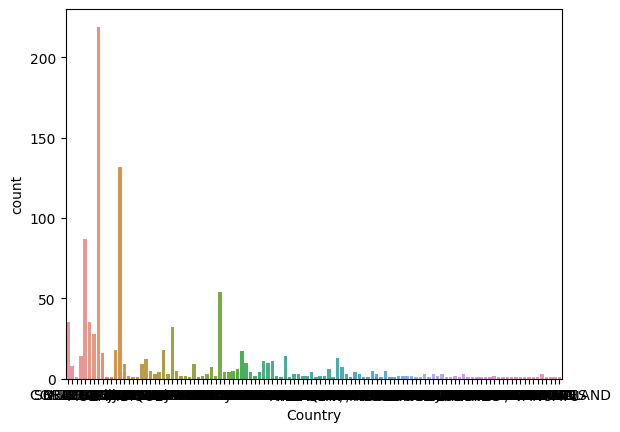

In [30]:
# Let's try know to visualize the repartition per country
sns.countplot(hypothesis_1, x="Country")

# As we can see, this is not visually appealing. There are too many countries - We will apply a threshold of 20 cases
# so we have only the countries where the cases arises the most 

In [31]:
hypothesis_2bis['Country'].value_counts()


SOUTH         5
NORTH         4
BRITISH       4
NEW           4
UNITED        3
             ..
EL            1
WESTERN       1
COSTA         1
FEDERATED     1
CEYLON (      1
Name: Country, Length: 69, dtype: int64

In [32]:
hypothesis_2bis['sex'].value_counts(ascending=True)


KeyError: 'sex'

In [ ]:
### v = df.Parameter.value_counts()
### df[df.Parameter.isin(v.index[v.gt(5)])]

hypothesis_3bis[hypothesis_3bis.Parameter.isin(hypothesis_2bis.index[hypothesis_2bis.gt(20)])]


In [ ]:
sns.countplot(hypothesis_3bis, x="Country")

## 3. Which activity is the most dangerous to women by XYZ shark ? 


In [7]:
shark[['Activity','Species ', 'Sex ']]


,Activity,Species,Sex
0,Paddling,White shark,F
1,Standing,NaN,F
2,Surfing,NaN,M
3,Surfing,2 m shark,M
4,Free diving,"Tiger shark, 3m",M
...,...,...,...
25718,NaN,NaN,NaN
25719,NaN,NaN,NaN
25720,NaN,NaN,NaN
25721,NaN,NaN,NaN


In [8]:
# I removed the Nan from the 3 column year 
Activity_3 = shark.dropna(axis=0, subset=['Activity','Species ', 'Sex '], inplace=False)
Activity_3 

,Activity,Sex,Species,Case Number.1,Case Number.2,Unnamed: 22,Unnamed: 23
0,Paddling,F,White shark,2018.06.25,2018.06.25,NaN,NaN
3,Surfing,M,2 m shark,2018.06.08,2018.06.08,NaN,NaN
4,Free diving,M,"Tiger shark, 3m",2018.06.04,2018.06.04,NaN,NaN
6,Swimming,M,Tiger shark,2018.06.03.a,2018.06.03.a,NaN,NaN
7,Fishing,M,"Lemon shark, 3'",2018.05.27,2018.05.27,NaN,NaN
...,...,...,...,...,...,...,...
6276,Standing,M,12' tiger shark,ND.0026,ND.0026,NaN,NaN
6293,Fishing,M,Blue pointer,ND.0009,ND.0009,NaN,NaN
6294,Fishing,M,Blue pointer,ND.0008,ND.0008,NaN,NaN
6295,Fishing,M,Blue pointers,ND.0007,ND.0007,NaN,NaN


In [9]:
Activity_3 = shark.drop(['Case Number', 'Date','Year', 'Type', 'Country', 'Area', 'Location', 'Name', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number', 'original order'], axis = 1, inplace = True) 
Activity_3

KeyError: "['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Name', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number', 'original order'] not found in axis"

In [ ]:
Activity_3.head()

In [ ]:
# Let's have a look at the activity value know  
Activity_3['Activity'].unique()

In [7]:
# Let's have a look at the species value know  
Activity_3['Species '].unique()

array(['White shark', '2 m shark', 'Tiger shark, 3m', ..., 'Blue pointer',
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [10]:
Activity_3['Sex '].unique()

array(['F', 'M', 'M ', 'lli', 'N', '.'], dtype=object)

In [11]:
Activity_3['Sex '] = Activity_3['Sex '].str.extract("(^F)")
Activity_3 = Activity_3[Activity_3['Sex '].notna()]
Activity_3['Sex '].unique()

array(['F'], dtype=object)

## 4. What time is the best time and location to get a fatal attack?